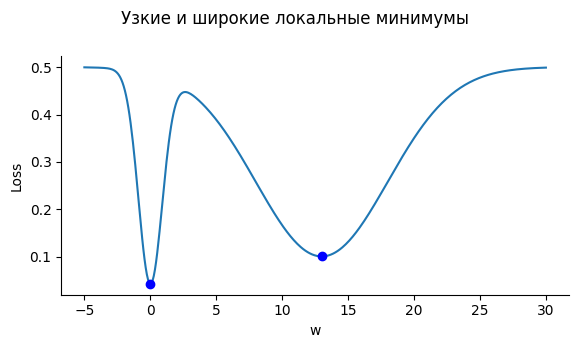

In [1]:
import jax
from jax import grad, random
from jax import numpy as jnp
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation

def inverse_gaussian_pdf(x, mu, sigma):
    # Calculate the coefficient
    coeff = -1 / (sigma * jnp.sqrt(2 * jnp.pi))
    # Calculate the exponent
    exponent = -((x - mu)**2) / (2 * sigma**2)
    # Return the PDF of the Gaussian distribution
    return coeff * jnp.exp(exponent)

mus = jnp.array([0, 13, 13, 13, 13, 13])  # Mean values for each component
sigmas = jnp.array([0.9, 5, 5, 5, 5, 5])  # Standard deviations for each component

def f(x, mus=mus, sigmas=sigmas):
    # Sum the densities of multiple inverse Gaussians
    return jnp.sum(jnp.array([inverse_gaussian_pdf(x, mu, sigma) for mu, sigma in zip(mus, sigmas)]), axis=0)*(1+0*jnp.sin(5*x))+0.5

# Gradient Descent Function
def gd(f, w_0, n_iter=20, lr=0.01):
    w = w_0
    g = jax.jit(grad(f))
    metrics = {
        "fs": [],
        "ws": [],
    }
    metrics["fs"].append(f(w))
    metrics["ws"].append(w)

    for i_iter in range(n_iter):
        w -= lr * g(w)
        metrics["fs"].append(f(w))
        metrics["ws"].append(w)
    
    return metrics

# Initial parameters
RNG = random.PRNGKey(0)
w_0 = jnp.array(2.0)  # Start at x=2

# Run gradient descent
metrics = gd(f, w_0, n_iter=150, lr=1e-1)

# Animation setup
fig, ax = plt.subplots(figsize=(6,3.5))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xlabel("w")
plt.ylabel("Loss")
# ax.spines['bottom'].set_visible(False)
# ax.spines['left'].set_visible(False)
plt.suptitle("Узкие и широкие локальные минимумы")
plt.tight_layout()
# plt.grid(linestyle=":")

# Plotting the function
x = jnp.linspace(-5, 30, 400)

# f_mod = lambda x: f(x-1)
# y_mod = f_mod(x)
# ax.plot(x, y_mod, 'r--', lw=1.5, label="Test")

y = f(x)
ax.plot(x, y, '-', lw=1.5)

# Marking the minima and drawing vertical lines
minima_x = jnp.array([0, 13])
minima_y = f(minima_x)
# minima_y_test = f_mod(minima_x)

ax.scatter(minima_x, minima_y, color='blue', zorder=5)  # Minima points on Train
# ax.scatter(minima_x, minima_y_test, color='red', zorder=5)  # Minima points on Train
# for min_x, min_y, min_y_test in zip(minima_x, minima_y, minima_y_test):
    # ax.vlines(min_x, min_y, min_y_test, linestyle='dashed', linewidth=1)  # Vertical dashed lines

# plt.legend(loc="center right")
plt.savefig("sam_a.pdf")
plt.savefig("sam_1.svg")
plt.show()

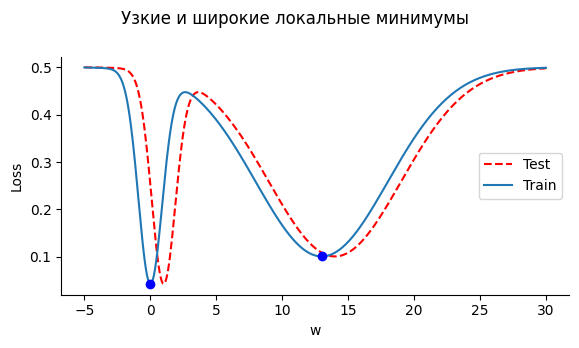

In [2]:
import jax
from jax import grad, random
from jax import numpy as jnp
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation

def inverse_gaussian_pdf(x, mu, sigma):
    # Calculate the coefficient
    coeff = -1 / (sigma * jnp.sqrt(2 * jnp.pi))
    # Calculate the exponent
    exponent = -((x - mu)**2) / (2 * sigma**2)
    # Return the PDF of the Gaussian distribution
    return coeff * jnp.exp(exponent)

mus = jnp.array([0, 13, 13, 13, 13, 13])  # Mean values for each component
sigmas = jnp.array([0.9, 5, 5, 5, 5, 5])  # Standard deviations for each component

def f(x, mus=mus, sigmas=sigmas):
    # Sum the densities of multiple inverse Gaussians
    return jnp.sum(jnp.array([inverse_gaussian_pdf(x, mu, sigma) for mu, sigma in zip(mus, sigmas)]), axis=0)*(1+0*jnp.sin(5*x))+0.5

# Gradient Descent Function
def gd(f, w_0, n_iter=20, lr=0.01):
    w = w_0
    g = jax.jit(grad(f))
    metrics = {
        "fs": [],
        "ws": [],
    }
    metrics["fs"].append(f(w))
    metrics["ws"].append(w)

    for i_iter in range(n_iter):
        w -= lr * g(w)
        metrics["fs"].append(f(w))
        metrics["ws"].append(w)
    
    return metrics

# Initial parameters
RNG = random.PRNGKey(0)
w_0 = jnp.array(2.0)  # Start at x=2

# Run gradient descent
metrics = gd(f, w_0, n_iter=150, lr=1e-1)

# Animation setup
fig, ax = plt.subplots(figsize=(6,3.5))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xlabel("w")
plt.ylabel("Loss")
# ax.spines['bottom'].set_visible(False)
# ax.spines['left'].set_visible(False)
plt.suptitle("Узкие и широкие локальные минимумы")
plt.tight_layout()
# plt.grid(linestyle=":")

# Plotting the function
x = jnp.linspace(-5, 30, 400)

f_mod = lambda x: f(x-1)
y_mod = f_mod(x)
ax.plot(x, y_mod, 'r--', lw=1.5, label="Test")

y = f(x)
ax.plot(x, y, '-', lw=1.5, label="Train")

plt.legend(loc="center right")

# Marking the minima and drawing vertical lines
minima_x = jnp.array([0, 13])
minima_y = f(minima_x)
minima_y_test = f_mod(minima_x)

ax.scatter(minima_x, minima_y, color='blue', zorder=5)  # Minima points on Train
# ax.scatter(minima_x, minima_y_test, color='red', zorder=5)  # Minima points on Train
# for min_x, min_y, min_y_test in zip(minima_x, minima_y, minima_y_test):
#     ax.vlines(min_x, min_y, min_y_test, linestyle='dashed', linewidth=1)  # Vertical dashed lines

plt.legend(loc="center right")
plt.savefig("sam_b.pdf")
plt.savefig("sam_2.svg")
plt.show()

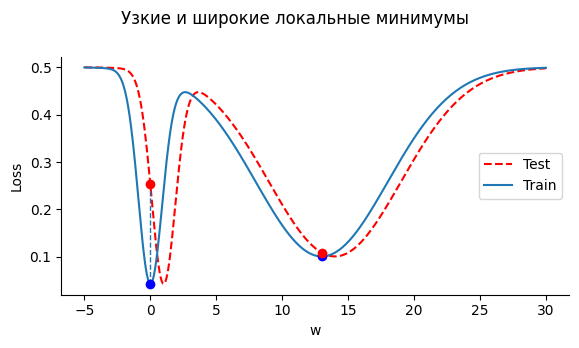

In [3]:
import jax
from jax import grad, random
from jax import numpy as jnp
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation

def inverse_gaussian_pdf(x, mu, sigma):
    # Calculate the coefficient
    coeff = -1 / (sigma * jnp.sqrt(2 * jnp.pi))
    # Calculate the exponent
    exponent = -((x - mu)**2) / (2 * sigma**2)
    # Return the PDF of the Gaussian distribution
    return coeff * jnp.exp(exponent)

mus = jnp.array([0, 13, 13, 13, 13, 13])  # Mean values for each component
sigmas = jnp.array([0.9, 5, 5, 5, 5, 5])  # Standard deviations for each component

def f(x, mus=mus, sigmas=sigmas):
    # Sum the densities of multiple inverse Gaussians
    return jnp.sum(jnp.array([inverse_gaussian_pdf(x, mu, sigma) for mu, sigma in zip(mus, sigmas)]), axis=0)*(1+0*jnp.sin(5*x))+0.5

# Gradient Descent Function
def gd(f, w_0, n_iter=20, lr=0.01):
    w = w_0
    g = jax.jit(grad(f))
    metrics = {
        "fs": [],
        "ws": [],
    }
    metrics["fs"].append(f(w))
    metrics["ws"].append(w)

    for i_iter in range(n_iter):
        w -= lr * g(w)
        metrics["fs"].append(f(w))
        metrics["ws"].append(w)
    
    return metrics

# Initial parameters
RNG = random.PRNGKey(0)
w_0 = jnp.array(2.0)  # Start at x=2

# Run gradient descent
metrics = gd(f, w_0, n_iter=150, lr=1e-1)

# Animation setup
fig, ax = plt.subplots(figsize=(6,3.5))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xlabel("w")
plt.ylabel("Loss")
# ax.spines['bottom'].set_visible(False)
# ax.spines['left'].set_visible(False)
plt.suptitle("Узкие и широкие локальные минимумы")
plt.tight_layout()
# plt.grid(linestyle=":")

# Plotting the function
x = jnp.linspace(-5, 30, 400)

f_mod = lambda x: f(x-1)
y_mod = f_mod(x)
ax.plot(x, y_mod, 'r--', lw=1.5, label="Test")

y = f(x)
ax.plot(x, y, '-', lw=1.5, label="Train")

plt.legend(loc="center right")

# Marking the minima and drawing vertical lines
minima_x = jnp.array([0, 13])
minima_y = f(minima_x)
minima_y_test = f_mod(minima_x)

ax.scatter(minima_x, minima_y, color='blue', zorder=5)  # Minima points on Train
ax.scatter(minima_x, minima_y_test, color='red', zorder=5)  # Minima points on Train
for min_x, min_y, min_y_test in zip(minima_x, minima_y, minima_y_test):
    ax.vlines(min_x, min_y, min_y_test, linestyle='dashed', linewidth=1)  # Vertical dashed lines

plt.legend(loc="center right")
plt.savefig("sam_c.pdf")
plt.savefig("sam_3.svg")
plt.show()

/var/folders/7m/3rbdnx5n5sz625f3l87m91cc0000gn/T/ipykernel_66095/433881520.py:69: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  current_iteration.set_data(w, f(w))  # Update the current position


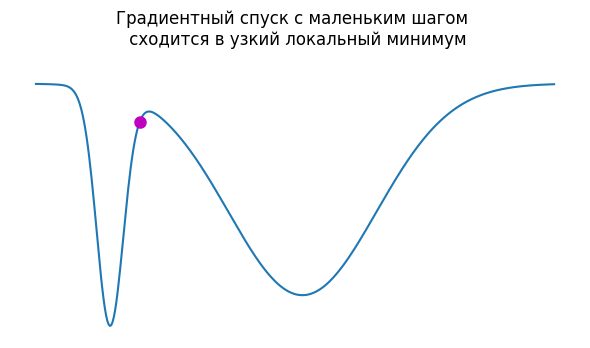

In [1]:
import jax
from jax import grad, random
from jax import numpy as jnp
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation

def inverse_gaussian_pdf(x, mu, sigma):
    # Calculate the coefficient
    coeff = -1 / (sigma * jnp.sqrt(2 * jnp.pi))
    # Calculate the exponent
    exponent = -((x - mu)**2) / (2 * sigma**2)
    # Return the PDF of the Gaussian distribution
    return coeff * jnp.exp(exponent)

mus = jnp.array([0, 13, 13, 13, 13, 13])  # Mean values for each component
sigmas = jnp.array([0.9, 5, 5, 5, 5, 5])  # Standard deviations for each component

def f(x, mus=mus, sigmas=sigmas):
    # Sum the densities of multiple inverse Gaussians
    return jnp.sum(jnp.array([inverse_gaussian_pdf(x, mu, sigma) for mu, sigma in zip(mus, sigmas)]), axis=0)*(1+0*jnp.sin(5*x))

# Gradient Descent Function
def gd(f, w_0, n_iter=20, lr=0.01):
    w = w_0
    g = jax.jit(grad(f))
    metrics = {
        "fs": [],
        "ws": [],
    }
    metrics["fs"].append(f(w))
    metrics["ws"].append(w)

    for i_iter in range(n_iter):
        w -= lr * g(w)
        metrics["fs"].append(f(w))
        metrics["ws"].append(w)
    
    return metrics

# Initial parameters
RNG = random.PRNGKey(0)
w_0 = jnp.array(2.0)  # Start at x=2

# Run gradient descent
metrics = gd(f, w_0, n_iter=150, lr=1e-1)

# Animation setup
fig, ax = plt.subplots(figsize=(6,3.5))
ax.axis('off')
plt.suptitle("Градиентный спуск с маленьким шагом \n сходится в узкий локальный минимум")
plt.tight_layout()
# plt.grid(linestyle=":")

# Plotting the function
x = jnp.linspace(-5, 30, 400)
y = f(x)
ax.plot(x, y, '-', lw=1.5)

# Setting up the points for GD trajectory
trajectory, = ax.plot([], [], 'm-', lw=1.5)  # Trajectory line
current_iteration, = ax.plot([], [], 'mo', markersize=8)  # Current position

# Animation function
def animate(i):
    w = metrics["ws"][i]
    ws = jnp.array(metrics["ws"][:i+1])
    
    trajectory.set_data(ws, f(ws))  # Update the trajectory line
    current_iteration.set_data(w, f(w))  # Update the current position
    
    return trajectory, current_iteration,

plt.savefig("SGD_1_pic.pdf")
# Animate the plots
ani = FuncAnimation(fig, animate, frames=len(metrics["ws"]), interval=300)

ani.save('SGD_1.mp4',fps=30, dpi=400)

# Optionally convert animation to HTML5 video and embed if using in a Jupyter Notebook
# video = ani.to_html5_video()

# from IPython import display
# html = display.HTML(video)
# plt.close()
# display.display(html)


/var/folders/7m/3rbdnx5n5sz625f3l87m91cc0000gn/T/ipykernel_79135/2709484280.py:69: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  current_iteration.set_data(w, f(w))  # Update the current position
/var/folders/7m/3rbdnx5n5sz625f3l87m91cc0000gn/T/ipykernel_79135/2709484280.py:69: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  current_iteration.set_data(w, f(w))  # Update the current position


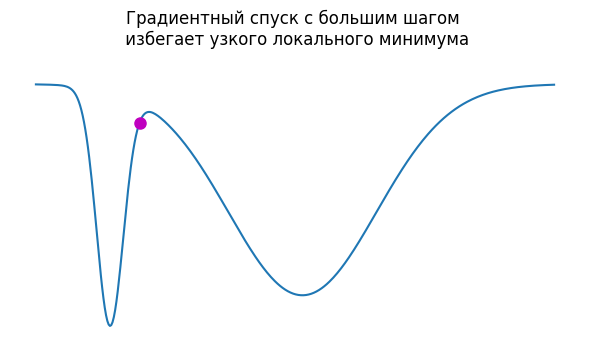

In [1]:
import jax
from jax import grad, random
from jax import numpy as jnp
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation

def inverse_gaussian_pdf(x, mu, sigma):
    # Calculate the coefficient
    coeff = -1 / (sigma * jnp.sqrt(2 * jnp.pi))
    # Calculate the exponent
    exponent = -((x - mu)**2) / (2 * sigma**2)
    # Return the PDF of the Gaussian distribution
    return coeff * jnp.exp(exponent)

mus = jnp.array([0, 13, 13, 13, 13, 13])  # Mean values for each component
sigmas = jnp.array([0.9, 5, 5, 5, 5, 5])  # Standard deviations for each component

def f(x, mus=mus, sigmas=sigmas):
    # Sum the densities of multiple inverse Gaussians
    return jnp.sum(jnp.array([inverse_gaussian_pdf(x, mu, sigma) for mu, sigma in zip(mus, sigmas)]), axis=0)*(1+0*jnp.sin(5*x))

# Gradient Descent Function
def gd(f, w_0, n_iter=20, lr=0.01):
    w = w_0
    g = jax.jit(grad(f))
    metrics = {
        "fs": [],
        "ws": [],
    }
    metrics["fs"].append(f(w))
    metrics["ws"].append(w)

    for i_iter in range(n_iter):
        w -= lr * g(w)
        metrics["fs"].append(f(w))
        metrics["ws"].append(w)
    
    return metrics

# Initial parameters
RNG = random.PRNGKey(0)
w_0 = jnp.array(2.0)  # Start at x=2

# Run gradient descent
metrics = gd(f, w_0, n_iter=75, lr=12.9)

# Animation setup
fig, ax = plt.subplots(figsize=(6,3.5))
ax.axis('off')
plt.suptitle("Градиентный спуск с большим шагом \n избегает узкого локального минимума")
plt.tight_layout()
# plt.grid(linestyle=":")

# Plotting the function
x = jnp.linspace(-5, 30, 400)
y = f(x)
ax.plot(x, y, '-', lw=1.5)

# Setting up the points for GD trajectory
trajectory, = ax.plot([], [], 'm-', lw=1.5)  # Trajectory line
current_iteration, = ax.plot([], [], 'mo', markersize=8)  # Current position

# Animation function
def animate(i):
    w = metrics["ws"][i]
    ws = jnp.array(metrics["ws"][:i+1])
    
    trajectory.set_data(ws, f(ws))  # Update the trajectory line
    current_iteration.set_data(w, f(w))  # Update the current position
    
    return trajectory, current_iteration,

# Animate the plots
ani = FuncAnimation(fig, animate, frames=len(metrics["ws"]), interval=300)

ani.save('SGD_2.mp4',fps=15, dpi=400)
plt.savefig("sgd_local_divergence.pdf")

# Optionally convert animation to HTML5 video and embed if using in a Jupyter Notebook
# video = ani.to_html5_video()

# from IPython import display
# html = display.HTML(video)
# plt.close()
# display.display(html)


/var/folders/7m/3rbdnx5n5sz625f3l87m91cc0000gn/T/ipykernel_66095/2707844300.py:69: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  current_iteration.set_data(w, f(w))  # Update the current position
/var/folders/7m/3rbdnx5n5sz625f3l87m91cc0000gn/T/ipykernel_66095/2707844300.py:69: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  current_iteration.set_data(w, f(w))  # Update the current position


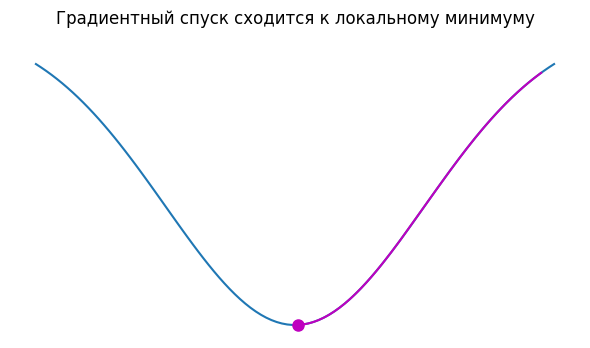

In [2]:
import jax
from jax import grad, random
from jax import numpy as jnp
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation

def inverse_gaussian_pdf(x, mu, sigma):
    # Calculate the coefficient
    coeff = -1 / (sigma * jnp.sqrt(2 * jnp.pi))
    # Calculate the exponent
    exponent = -((x - mu)**2) / (2 * sigma**2)
    # Return the PDF of the Gaussian distribution
    return coeff * jnp.exp(exponent)

mus = jnp.array([0])  # Mean values for each component
sigmas = jnp.array([1])  # Standard deviations for each component

def f(x, mus=mus, sigmas=sigmas):
    # Sum the densities of multiple inverse Gaussians
    return jnp.sum(jnp.array([inverse_gaussian_pdf(x, mu, sigma) for mu, sigma in zip(mus, sigmas)]), axis=0)*(1+0*jnp.sin(5*x))

# Gradient Descent Function
def gd(f, w_0, n_iter=20, lr=0.01):
    w = w_0
    g = jax.jit(grad(f))
    metrics = {
        "fs": [],
        "ws": [],
    }
    metrics["fs"].append(f(w))
    metrics["ws"].append(w)

    for i_iter in range(n_iter):
        w -= lr * g(w)
        metrics["fs"].append(f(w))
        metrics["ws"].append(w)
    
    return metrics

# Initial parameters
RNG = random.PRNGKey(0)
w_0 = jnp.array(1.9)

# Run gradient descent
metrics = gd(f, w_0, n_iter=150, lr=1e-1)

# Animation setup
fig, ax = plt.subplots(figsize=(6,3.5))
ax.axis('off')
plt.suptitle("Градиентный спуск сходится к локальному минимуму")
plt.tight_layout()
# plt.grid(linestyle=":")

# Plotting the function
x = jnp.linspace(-2, 2, 100)
y = f(x)
ax.plot(x, y, '-', lw=1.5)

# Setting up the points for GD trajectory
trajectory, = ax.plot([], [], 'm-', lw=1.5)  # Trajectory line
current_iteration, = ax.plot([], [], 'mo', markersize=8)  # Current position

# Animation function
def animate(i):
    w = metrics["ws"][i]
    ws = jnp.array(metrics["ws"][:i+1])
    
    trajectory.set_data(ws, f(ws))  # Update the trajectory line
    current_iteration.set_data(w, f(w))  # Update the current position
    
    return trajectory, current_iteration,

# Animate the plots
ani = FuncAnimation(fig, animate, frames=len(metrics["ws"]), interval=300)
plt.savefig("gd_scalar_convergence.pdf")
ani.save('SGD_3.mp4',fps=30, dpi=400)

# Optionally convert animation to HTML5 video and embed if using in a Jupyter Notebook
# video = ani.to_html5_video()

# from IPython import display
# html = display.HTML(video)
# plt.close()
# display.display(html)


/var/folders/7m/3rbdnx5n5sz625f3l87m91cc0000gn/T/ipykernel_66095/3055107187.py:69: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  current_iteration.set_data(w, f(w))  # Update the current position
/var/folders/7m/3rbdnx5n5sz625f3l87m91cc0000gn/T/ipykernel_66095/3055107187.py:69: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  current_iteration.set_data(w, f(w))  # Update the current position


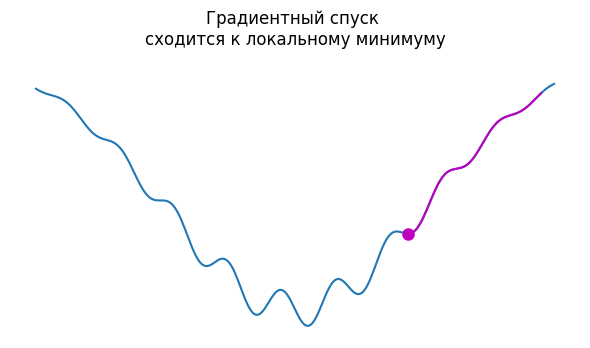

In [3]:
import jax
from jax import grad, random
from jax import numpy as jnp
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation

def inverse_gaussian_pdf(x, mu, sigma):
    # Calculate the coefficient
    coeff = -1 / (sigma * jnp.sqrt(2 * jnp.pi))
    # Calculate the exponent
    exponent = -((x - mu)**2) / (2 * sigma**2)
    # Return the PDF of the Gaussian distribution
    return coeff * jnp.exp(exponent)

mus = jnp.array([0])  # Mean values for each component
sigmas = jnp.array([1])  # Standard deviations for each component

def f(x, mus=mus, sigmas=sigmas):
    # Sum the densities of multiple inverse Gaussians
    return jnp.sum(jnp.array([inverse_gaussian_pdf(x, mu, sigma) for mu, sigma in zip(mus, sigmas)]), axis=0)*(1+7e-2*jnp.sin(15*x))

# Gradient Descent Function
def gd(f, w_0, n_iter=20, lr=0.01):
    w = w_0
    g = jax.jit(grad(f))
    metrics = {
        "fs": [],
        "ws": [],
    }
    metrics["fs"].append(f(w))
    metrics["ws"].append(w)

    for i_iter in range(n_iter):
        w -= lr * g(w)
        metrics["fs"].append(f(w))
        metrics["ws"].append(w)
    
    return metrics

# Initial parameters
RNG = random.PRNGKey(0)
w_0 = jnp.array(1.9)  # Start at x=2

# Run gradient descent
metrics = gd(f, w_0, n_iter=150, lr=1e-1)

# Animation setup
fig, ax = plt.subplots(figsize=(6,3.5))
ax.axis('off')
plt.suptitle("Градиентный спуск \nсходится к локальному минимуму")
plt.tight_layout()
# plt.grid(linestyle=":")

# Plotting the function
x = jnp.linspace(-2, 2, 300)
y = f(x)
ax.plot(x, y, '-', lw=1.5)

# Setting up the points for GD trajectory
trajectory, = ax.plot([], [], 'm-', lw=1.5)  # Trajectory line
current_iteration, = ax.plot([], [], 'mo', markersize=8)  # Current position

# Animation function
def animate(i):
    w = metrics["ws"][i]
    ws = jnp.array(metrics["ws"][:i+1])
    
    trajectory.set_data(ws, f(ws))  # Update the trajectory line
    current_iteration.set_data(w, f(w))  # Update the current position
    
    return trajectory, current_iteration,

# Animate the plots
ani = FuncAnimation(fig, animate, frames=len(metrics["ws"]), interval=300)
plt.savefig("gd_scalar_convergence_to_local_minimum.pdf")
ani.save('SGD_4.mp4',fps=30, dpi=400)

# Optionally convert animation to HTML5 video and embed if using in a Jupyter Notebook
# video = ani.to_html5_video()

# from IPython import display
# html = display.HTML(video)
# plt.close()
# display.display(html)


/var/folders/7m/3rbdnx5n5sz625f3l87m91cc0000gn/T/ipykernel_79135/3034512631.py:72: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  current_iteration.set_data(w, f(w))  # Update the current position
/var/folders/7m/3rbdnx5n5sz625f3l87m91cc0000gn/T/ipykernel_79135/3034512631.py:72: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  current_iteration.set_data(w, f(w))  # Update the current position


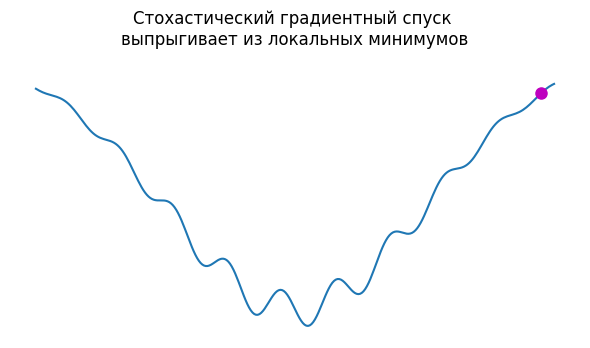

In [2]:
import jax
from jax import grad, random
from jax import numpy as jnp
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation

def inverse_gaussian_pdf(x, mu, sigma):
    # Calculate the coefficient
    coeff = -1 / (sigma * jnp.sqrt(2 * jnp.pi))
    # Calculate the exponent
    exponent = -((x - mu)**2) / (2 * sigma**2)
    # Return the PDF of the Gaussian distribution
    return coeff * jnp.exp(exponent)

mus = jnp.array([0])  # Mean values for each component
sigmas = jnp.array([1])  # Standard deviations for each component

def f(x, mus=mus, sigmas=sigmas):
    # Sum the densities of multiple inverse Gaussians
    return jnp.sum(jnp.array([inverse_gaussian_pdf(x, mu, sigma) for mu, sigma in zip(mus, sigmas)]), axis=0)*(1+7e-2*jnp.sin(15*x))

# Initial parameters
RNG = random.PRNGKey(0)

# Gradient Descent Function
def sgd(f, w_0, n_iter=20, lr=0.01, sigma=9e-1, RNG=RNG):
    w = w_0
    g = jax.jit(grad(f))
    metrics = {
        "fs": [],
        "ws": [],
    }
    metrics["fs"].append(f(w))
    metrics["ws"].append(w)

    for i_iter in range(n_iter):
        RNG, _ = random.split(RNG)
        noise = sigma*random.normal(RNG)
        w -= lr * (g(w) + noise)
        metrics["fs"].append(f(w))
        metrics["ws"].append(w)
    
    return metrics

w_0 = jnp.array(1.9)  # Start at x=2

# Run gradient descent
metrics = sgd(f, w_0, n_iter=300, lr=1e-1)

# Animation setup
fig, ax = plt.subplots(figsize=(6,3.5))
ax.axis('off')
plt.suptitle("Стохастический градиентный спуск \nвыпрыгивает из локальных минимумов")
plt.tight_layout()
# plt.grid(linestyle=":")

# Plotting the function
x = jnp.linspace(-2, 2, 300)
y = f(x)
ax.plot(x, y, '-', lw=1.5)

# Setting up the points for GD trajectory
trajectory, = ax.plot([], [], 'm-', lw=1.5)  # Trajectory line
current_iteration, = ax.plot([], [], 'mo', markersize=8)  # Current position

# Animation function
def animate(i):
    w = metrics["ws"][i]
    ws = jnp.array(metrics["ws"][:i+1])
    
    trajectory.set_data(ws, f(ws))  # Update the trajectory line
    current_iteration.set_data(w, f(w))  # Update the current position
    
    return trajectory, current_iteration,

# Animate the plots
ani = FuncAnimation(fig, animate, frames=len(metrics["ws"]), interval=300)

ani.save('SGD_5.mp4',fps=30, dpi=400)
plt.savefig("sgd_escape.pdf")

# Optionally convert animation to HTML5 video and embed if using in a Jupyter Notebook
# video = ani.to_html5_video()

# from IPython import display
# html = display.HTML(video)
# plt.close()
# display.display(html)
